In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from itertools import product

In [ ]:
def get_regression(X, y, regressors,texts):
  

  f, axarr = plt.subplots(2,2, sharex='col', sharey='row', figsize=(10, 8))

  for idx, clf, tt in zip(product([0, 1], [0, 1]),
                          regressors,
                          texts):
      y_pred = clf.predict(np.sort(X_test.reshape(-1)).reshape(-1,1))

      axarr[idx[0], idx[1]].plot(np.sort(X_test.reshape(-1)).reshape(-1,1), y_pred)
      axarr[idx[0], idx[1]].scatter(X, y, c=y,
                                    s=20, edgecolor='k')
      axarr[idx[0], idx[1]].set_title(tt)

  plt.show()

In [ ]:
def report_regression( X, y,regressors,texts):
  from sklearn.metrics import mean_squared_error as mse
  results = {}
  for clf, tt in zip(     regressors,
                          texts):
      y_pred = clf.predict(X)
      results[tt] = mse(y, y_pred)


  return results

## Get  Dataset

In [ ]:
from sklearn.datasets import load_boston
data = load_boston()

In [ ]:
data.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [ ]:
X = data.data
y = data.target

In [ ]:
from sklearn.decomposition import PCA
obj = PCA()
X   = obj.fit_transform(X)

In [ ]:
# TRAIN TEST SPLIT
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X[:,0:1], y, test_size = 0.1)

In [ ]:
# # Feature Scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler()
# X_train = sc.fit_transform(X_train)
# X_test = sc.transform(X_test)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
regressors = [
    DecisionTreeRegressor().fit(X_train, y_train),
    KNeighborsRegressor().fit(X_train, y_train),
    SVR(gamma=.1, kernel='rbf').fit(X_train, y_train),
    LinearRegression().fit(X_train, y_train)
    ]
texts = [    "DecisionTreeRegressor",
              "KNeighborsRegressor",
              "SVR",
              "LinearRegression"]

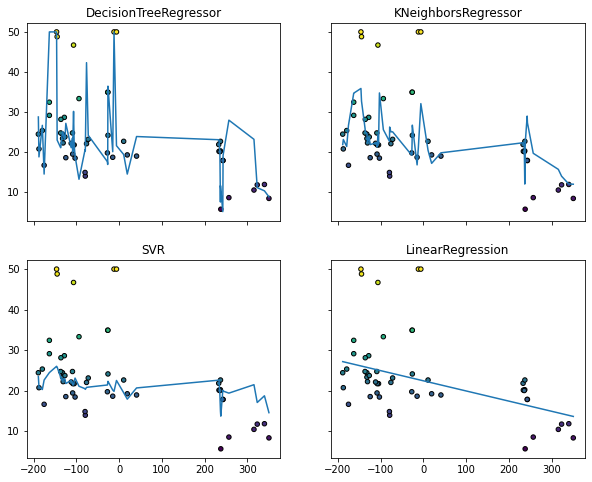

In [ ]:
get_regression(X_test, y_test, regressors, texts)

In [ ]:
report = report_regression( X_test, y_test,regressors,texts)
report

{'DecisionTreeRegressor': 101.53196078431371,
 'KNeighborsRegressor': 77.97884705882352,
 'LinearRegression': 86.15690080646256,
 'SVR': 93.85606856535595}

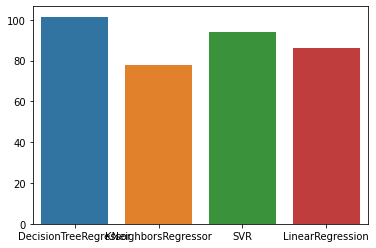

In [ ]:
keys = list(report.keys())
vals = [float(report[k]) for k in keys]
sns.barplot(x=keys, y=vals)